In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.interpolate import interp2d, LinearNDInterpolator
import randomlatticethermalized as rlt
import movies_from_plots as mfp
import selfpropelledparticlevoronoi as sppv
import pathlib
from scipy import ndimage as nd 
import h5py as h5
import importlib

In [3]:
import topologicaltransitions as tpt
import weightedgraphanalysis as wga

In [22]:
importlib.reload(mfp)
importlib.reload(sppv)
importlib.reload(rlt)
importlib.reload(tpt)
importlib.reload(wga)

<module 'weightedgraphanalysis' from '/home/rafael/Documents/tissuewoundmodelling-main/SpringNetworkSimul/weightedgraphanalysis.py'>

# 

In [ ]:
main_path = pathlib.Path().absolute()
datafileloadname = input('Name of savefile to load: ')
datafileloadname = datafileloadname + '.h5'
data_set = h5.File(str(main_path) + '/' + datafileloadname,'r')
coords = np.array(data_set['centers'])
N = np.array(data_set['number of centers'])
wloc = np.array(data_set['woundlocation'])
data_set.close()

In [467]:
vor = Voronoi(coords)
vorPointRegion = vor.point_region
vorRegions = vor.regions
vorRidges = sppv.remove_minus(vor.ridge_vertices)
vorVertices = np.array(sppv.vertices_in_bound(list(vor.vertices),5))

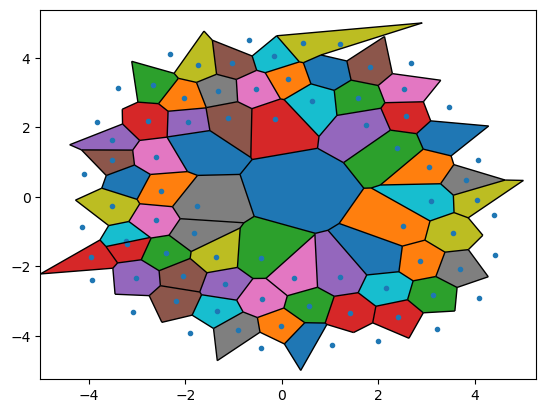

In [469]:
voronoi_plot_2d(vor,show_vertices=False)
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region if sppv.norm(vor.vertices[i]) < np.sqrt(2)*10]
        plt.fill(*zip(*polygon))

In [470]:
Bound = sppv.find_boundary_vertices(len(vorVertices),vorRidges)
Bound2 = sppv.find_wound_boundary(vorRegions,vorPointRegion,wloc)

In [471]:
lbound_up = np.where(vorVertices[Bound,1]>3)
bound_up = np.array(Bound)[lbound_up]

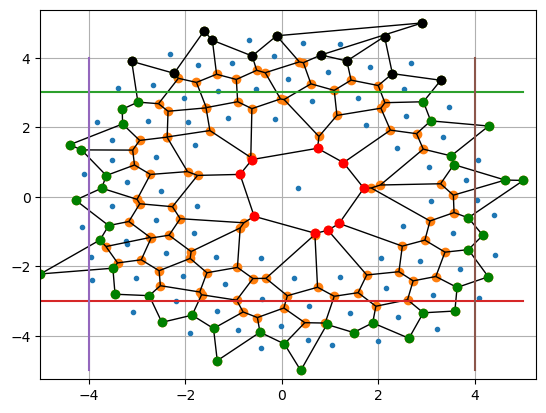

In [475]:
fig = voronoi_plot_2d(vor,show_vertices=True)
plt.plot(vorVertices[Bound2,0],vorVertices[Bound2,1],'ro')
plt.plot(vorVertices[Bound,0],vorVertices[Bound,1],'go')
plt.plot(vorVertices[bound_up,0],vorVertices[bound_up,1],'ko')
plt.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 + 3)
plt.plot(np.arange(-5,5.5), np.arange(-5,5.5)*0 - 3)
plt.plot(np.arange(-5,5)*0-4, np.arange(-5,5))
plt.plot(np.arange(-5,5)*0+4, np.arange(-5,5))  
plt.grid()
#plt.xlim(-6,-4)
#plt.ylim(-0.5,1)
plt.show()


In [149]:
import findconnections as fc

# Testing topological transition

In [336]:
R1 = [1,2,3,4,5]
R2 = [2,3,6,7,8]
R3 = [3,4,7,9,10]
R4 = [1,2,6,11,12]

regions = [R1,R2,R3,R4]
point_regions = [0,1,2,3]

vertices_neigh_min = list((set(R1).intersection(R2)).union(set(R1).intersection(R3)).union(set(R3).intersection(R2)))
vertices_neigh = list((set(R1).intersection(R2)).union(set(R1).intersection(R4)).union(set(R4).intersection(R2)))


In [357]:
Ridges = [[1,2],[2,3],[3,4],[1,5],[5,4],[4,9],[9,10],[7,10],[7,8],[6,8],[6,12],[11,12],[1,11],[3,7],[2,6]]

In [358]:
import networkx as nx

In [359]:
G = nx.Graph()
G.add_edges_from(Ridges)

In [360]:
list(G.edges([2]))

[(2, 1), (2, 3), (2, 6)]

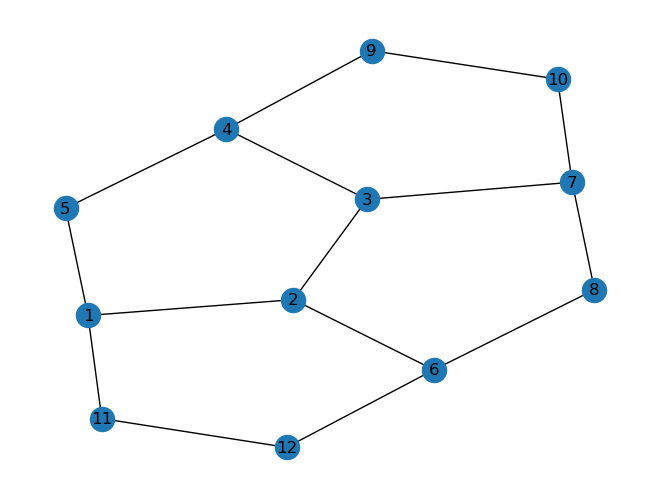

In [446]:
nx.draw(G, with_labels = True,pos = nx.spring_layout(G),)

In [337]:
print(vertices_neigh_min)
print(vertices_neigh)

[2, 3, 4, 7]
[1, 2, 3, 6]


In [338]:
#For vertex i
regions_neigh_v, center = fc.find_vertex_neighbour_centers(regions,point_regions,2)
                                
#For neighbouring vertex v_min
regions_neigh_vmin, center = fc.find_vertex_neighbour_centers(regions,point_regions,3)


In [339]:
region_common = list(set(regions_neigh_v).intersection(regions_neigh_vmin))
                        
region_exc_v = list(set(regions_neigh_v).difference(region_common))
                
region_exc_vmin = list(set(regions_neigh_vmin).difference(region_common))

In [340]:
region_exc_vmin[0]

2

In [341]:
new_region_common = list(set(region_exc_v).union(region_exc_vmin))
p_1 = np.random.rand()
i_v = 0
i_min = 1
if p_1 < 0.5:
    i_v = 1
    i_min = 0

In [342]:
#New exclusive regions for i and v_min
new_region_exc_v = region_common[i_v]   
new_region_exc_min = region_common[i_min]

In [343]:
new_region_v = list(set(new_region_common).union([new_region_exc_v]))      
new_region_vmin = list(set(new_region_common).union([new_region_exc_min]))

In [344]:
regions[region_exc_v[0]].append(3)
regions[region_exc_vmin[0]].append(2)
                            
                        
regions[new_region_exc_v].remove(3)
regions[new_region_exc_min].remove(2)
                        
edge_common_v = list(set(regions[new_region_common[0]]).intersection(regions[new_region_common[1]]))

new_neighv = list(set(regions[new_region_exc_v]).intersection(regions[region_exc_vmin[0]]).difference(set(edge_common_v).intersection(regions[new_region_exc_v])))
new_neighvm = list(set(regions[region_exc_v[0]]).intersection(regions[new_region_exc_min]).difference(set(edge_common_v).intersection(regions[new_region_exc_min])))

In [345]:
print(new_neighv)
print(new_neighvm)

[4]
[6]


In [421]:
vertices_neigh_min = list(set(vertices_neigh_min).difference(new_neighv).union(new_neighvm))
vertices_neigh = list(set(vertices_neigh).difference(new_neighvm).union(new_neighv))

In [422]:
print(vertices_neigh_min)
print(vertices_neigh)

[2, 3, 6, 7]
[1, 2, 3, 4]


In [423]:
newRidges = np.array(Ridges)

In [424]:
loc_ridges = np.where(newRidges == 2)[0]
loc_neigh_not_vm = np.where(np.array(vertices_neigh)!=3)[0]
skip_parameter = int(0)
print(vertices_neigh)
for j in range(len(loc_ridges)):   
    if 3 in newRidges[loc_ridges[j]]:
        skip_parameter += int(1)
        continue
    else:
        js = int(j+skip_parameter)
        newRidges[loc_ridges[j]]= [vertices_neigh[loc_neigh_not_vm[j]],2]  



[1, 2, 3, 4]


In [425]:
newRidges[loc_ridges]

array([[1, 2],
       [2, 3],
       [4, 2]])

In [407]:

    
#print(loc_ridges)
            

loc_ridges = np.where(newRidges == 3)[0]        
loc_neigh_not_i = np.where(np.array(vertices_neigh_min)!= 2)[0]
#print((len(loc_ridges),len(loc_neigh_not_i),len(vertices_neigh_min)))
            
skip_parameter = int(0)
                        
for j in range(len(loc_ridges)):
    if 2 in newRidges[loc_ridges[j]]:
        skip_parameter+=int(1)
        continue
    else:
        js = int(j-skip_parameter)
        newRidges[loc_ridges[j]]= [vertices_neigh_min[loc_neigh_not_i[j]],3]

In [410]:
Gnew = nx.Graph()
Gnew.add_edges_from(newRidges)

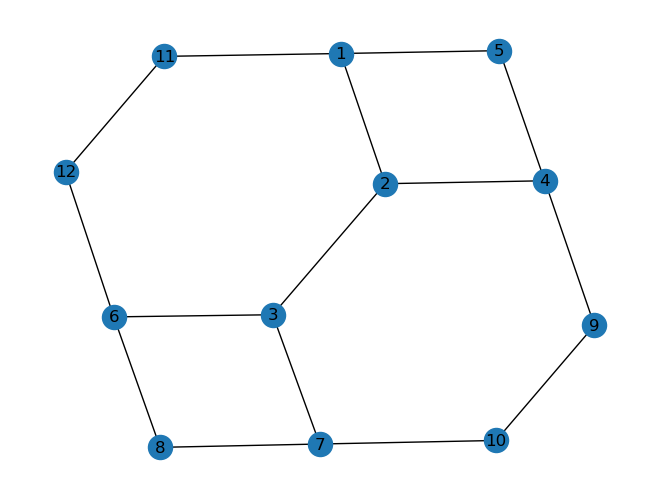

In [447]:
nx.draw(Gnew, with_labels = True,pos = nx.spring_layout(Gnew))
#nx.draw(G, with_labels = True)